In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm 
import xgboost as xgb
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns

%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('../dataset//mlb_fa_list.csv')

print(df.shape)
df.tail()

(1200, 72)


,Name,Yr,Team,G,AB,PA,H_b,1B,2B,3B,HR_b,R_b,RBI,BB_b,IBB_b,SO_b,BB%,K%,BB/K,BABIP_b,HBP_b,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC+,WPA,W,L,GS,CG,IP,H_p,HR_p,BB_p,SO_p,R_p,SV,BS,BK,ER,HBP_p,HLD,IBB_p,ShO,TBF,WP,HR/9,BB/9,K/9,K/BB,K-BB%,GB%,HR/FB,LOB%,ERA,BABIP_p,FIP,WHIP,Contract Yrs,Total Salary($),Avg Salary($)
1195,Trevor Plouffe,2017,Athletics,100,283.0,313.0,56.0,40.0,7.0,0.0,9.0,31.0,19.0,28.0,2.0,88.0,8.9,28.1,0.32,0.251,1.0,1.0,0.0,12.0,1.0,2.0,-4.0,0.120,0.258,-16.6,0.198,0.272,0.318,0.590,-1.2,58.0,-3.52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,1.0,5250000.0,5250000.0
1196,Tyson Ross,2017,Rangers,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,-0.2,0.0,-1.21,3.0,3.0,10.0,0.0,49.0,53.0,7.0,37.0,36.0,46.0,0.0,0.0,0.0,42.0,6.0,0.0,0.0,0.0,238.0,4.0,1.29,6.8,6.61,0.97,-0.4,46.8,13.0,58.0,7.71,0.303,6.18,1.84,1.0,6000000.0,6000000.0
1197,Welington Castillo,2017,Orioles,96,341.0,365.0,96.0,65.0,11.0,0.0,20.0,44.0,53.0,22.0,0.0,97.0,6.0,26.6,0.23,0.336,0.0,2.0,0.0,10.0,0.0,0.0,10.8,0.208,0.344,7.0,0.282,0.323,0.490,0.813,2.7,113.0,1.72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,2.0,13000000.0,6500000.0
1198,Wilson Ramos,2017,Rays,64,208.0,224.0,54.0,37.0,6.0,0.0,11.0,19.0,35.0,10.0,2.0,36.0,4.5,16.1,0.28,0.262,0.0,3.0,0.0,11.0,0.0,0.0,2.2,0.188,0.307,-2.7,0.260,0.290,0.447,0.737,0.4,92.0,-0.62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,2.0,12500000.0,6250000.0
1199,Yoenis Cespedes,2017,Mets,81,291.0,321.0,85.0,49.0,17.0,2.0,17.0,46.0,42.0,26.0,5.0,61.0,8.1,19.0,0.43,0.316,2.0,2.0,0.0,7.0,0.0,1.0,-6.2,0.247,0.369,13.1,0.292,0.352,0.540,0.892,1.6,131.0,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,4.0,110000000.0,27500000.0


In [5]:
df.rename(columns={"Avg Salary($)": "Salary"}, inplace=True)
df.tail()

,Name,Yr,Team,G,AB,PA,H_b,1B,2B,3B,HR_b,R_b,RBI,BB_b,IBB_b,SO_b,BB%,K%,BB/K,BABIP_b,HBP_b,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC+,WPA,W,L,GS,CG,IP,H_p,HR_p,BB_p,SO_p,R_p,SV,BS,BK,ER,HBP_p,HLD,IBB_p,ShO,TBF,WP,HR/9,BB/9,K/9,K/BB,K-BB%,GB%,HR/FB,LOB%,ERA,BABIP_p,FIP,WHIP,Contract Yrs,Total Salary($),Salary
1195,Trevor Plouffe,2017,Athletics,100,283.0,313.0,56.0,40.0,7.0,0.0,9.0,31.0,19.0,28.0,2.0,88.0,8.9,28.1,0.32,0.251,1.0,1.0,0.0,12.0,1.0,2.0,-4.0,0.120,0.258,-16.6,0.198,0.272,0.318,0.590,-1.2,58.0,-3.52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,1.0,5250000.0,5250000.0
1196,Tyson Ross,2017,Rangers,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,-0.2,0.0,-1.21,3.0,3.0,10.0,0.0,49.0,53.0,7.0,37.0,36.0,46.0,0.0,0.0,0.0,42.0,6.0,0.0,0.0,0.0,238.0,4.0,1.29,6.8,6.61,0.97,-0.4,46.8,13.0,58.0,7.71,0.303,6.18,1.84,1.0,6000000.0,6000000.0
1197,Welington Castillo,2017,Orioles,96,341.0,365.0,96.0,65.0,11.0,0.0,20.0,44.0,53.0,22.0,0.0,97.0,6.0,26.6,0.23,0.336,0.0,2.0,0.0,10.0,0.0,0.0,10.8,0.208,0.344,7.0,0.282,0.323,0.490,0.813,2.7,113.0,1.72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,2.0,13000000.0,6500000.0
1198,Wilson Ramos,2017,Rays,64,208.0,224.0,54.0,37.0,6.0,0.0,11.0,19.0,35.0,10.0,2.0,36.0,4.5,16.1,0.28,0.262,0.0,3.0,0.0,11.0,0.0,0.0,2.2,0.188,0.307,-2.7,0.260,0.290,0.447,0.737,0.4,92.0,-0.62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,2.0,12500000.0,6250000.0
1199,Yoenis Cespedes,2017,Mets,81,291.0,321.0,85.0,49.0,17.0,2.0,17.0,46.0,42.0,26.0,5.0,61.0,8.1,19.0,0.43,0.316,2.0,2.0,0.0,7.0,0.0,1.0,-6.2,0.247,0.369,13.1,0.292,0.352,0.540,0.892,1.6,131.0,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00,4.0,110000000.0,27500000.0


In [6]:
df.dtypes

Name                object
Yr                   int64
Team                object
G                    int64
AB                 float64
PA                 float64
H_b                float64
1B                 float64
2B                 float64
3B                 float64
HR_b               float64
R_b                float64
RBI                float64
BB_b               float64
IBB_b              float64
SO_b               float64
BB%                float64
K%                 float64
BB/K               float64
BABIP_b            float64
HBP_b              float64
SF                 float64
SH                 float64
GDP                float64
SB                 float64
CS                 float64
Def                float64
ISO                float64
wOBA               float64
wRAA               float64
AVG                float64
OBP                float64
SLG                float64
OPS                float64
WAR                float64
wRC+               float64
WPA                float64
W

In [7]:
df.describe()

,Yr,G,AB,PA,H_b,1B,2B,3B,HR_b,R_b,RBI,BB_b,IBB_b,SO_b,BB%,K%,BB/K,BABIP_b,HBP_b,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC+,WPA,W,L,GS,CG,IP,H_p,HR_p,BB_p,SO_p,R_p,SV,BS,BK,ER,HBP_p,HLD,IBB_p,ShO,TBF,WP,HR/9,BB/9,K/9,K/BB,K-BB%,GB%,HR/FB,LOB%,ERA,BABIP_p,FIP,WHIP,Contract Yrs,Total Salary($),Salary
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1.200000e+03,1.200000e+03
mean,2011.469167,75.087500,178.097500,199.583333,46.391667,30.773333,9.291667,0.773333,5.553333,22.927500,22.936667,17.063333,1.241667,35.730833,4.324250,10.040917,0.257933,0.153008,1.914167,1.509167,0.964167,4.212500,2.413333,0.961667,-0.715583,0.076445,0.164789,0.720417,0.132478,0.167763,0.208903,0.376678,0.944750,48.338333,0.072567,2.464167,2.472500,4.700833,0.115833,42.366083,42.372500,4.908333,14.151667,33.663333,21.016667,1.758333,0.706667,0.115833,19.377500,1.576667,2.545833,1.210000,0.046667,181.235833,1.430833,0.522058,1.608575,3.611217,1.277567,5.284250,21.555083,5.333583,35.744167,2.084342,0.145095,2.074100,0.670958,1.690000,1.339037e+07,4.928296e+06
std,3.417423,44.203429,205.199591,230.022416,55.977878,37.524664,11.700029,1.625574,8.548570,28.876642,29.511101,22.692476,2.871434,43.667025,4.763929,10.898781,0.306585,0.147992,3.212538,2.215251,2.151373,5.650571,6.336083,2.015419,6.007365,0.085505,0.160314,9.382646,0.128871,0.162577,0.207259,0.368059,1.448311,50.981792,1.425022,3.974739,3.788738,10.173048,0.575348,60.767485,62.057108,7.546460,20.157354,48.226806,30.875678,6.795961,1.563967,0.413391,28.478984,2.744765,5.688866,1.999808,0.279083,258.364995,2.434506,0.675729,1.884800,3.969940,1.664418,7.037507,22.818578,6.609057,36.894076,2.413092,0.150848,2.258178,0.711700,1.294332,2.956699e+07,5.042442e+06
min,2006.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-37.600000,0.000000,0.000000,-29.700000,0.000000,0.000000,0.000000,0.000000,-2.400000,-1.000000,-4.130000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-11.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.800000e+05,3.800000e+05
25%,2009.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.200000,0.000000,0.000000,-1.425000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.840000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.500000e+06,1.500000e+06
50%,2011.000000,67.000000,87.500000,97.500000,21.000000,13.000000,3.000000,0.000000,0.000000,8.000000,7.000000,4.500000,0.000000,20.500000,2.800000,8.850000,0.145000,0.221000,0.000000,0.000000,0.00

## * Splitting Dependent & Independent Variables

In [8]:
df_x = df.iloc[:, 3:69]

In [9]:
df_x.insert(0, 'Yr', df['Yr'])

In [10]:
print(df_x.shape)
df_x.tail(10)

(1200, 67)


,Yr,G,AB,PA,H_b,1B,2B,3B,HR_b,R_b,RBI,BB_b,IBB_b,SO_b,BB%,K%,BB/K,BABIP_b,HBP_b,SF,SH,GDP,SB,CS,Def,ISO,wOBA,wRAA,AVG,OBP,SLG,OPS,WAR,wRC+,WPA,W,L,GS,CG,IP,H_p,HR_p,BB_p,SO_p,R_p,SV,BS,BK,ER,HBP_p,HLD,IBB_p,ShO,TBF,WP,HR/9,BB/9,K/9,K/BB,K-BB%,GB%,HR/FB,LOB%,ERA,BABIP_p,FIP,WHIP
1190,2017,54,132.0,153.0,22.0,15.0,2.0,0.0,5.0,18.0,8.0,16.0,1.0,57.0,10.5,37.3,0.28,0.243,4.0,0.0,1.0,3.0,1.0,0.0,-1.2,0.129,0.257,-8.2,0.167,0.276,0.295,0.572,-0.5,55.0,-0.89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00
1191,2017,55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.3,0.0,1.03,3.0,1.0,0.0,0.0,55.2,42.0,9.0,19.0,59.0,23.0,0.0,1.0,1.0,22.0,1.0,11.0,2.0,0.0,224.0,2.0,1.46,3.07,9.54,3.11,17.9,37.2,14.5,79.0,3.56,0.243,4.22,1.10
1192,2017,46,95.0,106.0,24.0,16.0,7.0,0.0,1.0,9.0,17.0,8.0,0.0,21.0,7.5,19.8,0.38,0.303,0.0,3.0,0.0,2.0,0.0,0.0,1.3,0.105,0.285,-3.2,0.253,0.302,0.358,0.660,0.1,70.0,-0.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00
1193,2017,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,-0.6,0.0,-2.59,4.0,7.0,14.0,0.0,94.0,118.0,19.0,45.0,65.0,77.0,0.0,1.0,0.0,71.0,2.0,1.0,0.0,0.0,436.0,1.0,1.82,4.31,6.22,1.44,4.6,35.6,14.0,63.6,6.80,0.325,5.90,1.73
1194,2017,21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.3,0.0,-1.00,4.0,3.0,14.0,0.0,84.0,91.0,16.0,45.0,87.0,50.0,0.0,0.0,0.0,46.0,3.0,1.0,1.0,0.0,381.0,16.0,1.71,4.82,9.32,1.93,11.0,55.6,25.0,76.3,4.93,0.326,5.28,1.62
1195,2017,100,283.0,313.0,56.0,40.0,7.0,0.0,9.0,31.0,19.0,28.0,2.0,88.0,8.9,28.1,0.32,0.251,1.0,1.0,0.0,12.0,1.0,2.0,-4.0,0.120,0.258,-16.6,0.198,0.272,0.318,0.590,-1.2,58.0,-3.52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00
1196,2017,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,-0.2,0.0,-1.21,3.0,3.0,10.0,0.0,49.0,53.0,7.0,37.0,36.0,46.0,0.0,0.0,0.0,42.0,6.0,0.0,0.0,0.0,238.0,4.0,1.29,6.80,6.61,0.97,-0.4,46.8,13.0,58.0,7.71,0.303,6.18,1.84
1197,2017,96,341.0,365.0,96.0,65.0,11.0,0.0,20.0,44.0,53.0,22.0,0.0,97.0,6.0,26.6,0.23,0.336,0.0,2.0,0.0,10.0,0.0,0.0,10.8,0.208,0.344,7.0,0.282,0.323,0.490,0.813,2.7,113.0,1.72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00
1198,2017,64,208.0,224.0,54.0,37.0,6.0,0.0,11.0,19.0,35.0,10.0,2.0,36.0,4.5,16.1,0.28,0.262,0.0,3.0,0.0,11.0,0.0,0.0,2.2,0.188,0.307,-2.7,0.260,0.290,0.447,0.737,0.4,92.0,-0.62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00
1199,2017,81,291.0,321.0,85.0,49.0,17.0,2.0,17.0,46.0,42.0,26.0,5.0,61.0,8.1,19.0,0.43,0.316,2.0,2.0,0.0,7.0,0.0,1.0,-6.2,0.247,0.369,13.1,0.292,0.352,0.540,0.892,1.6,131.0,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.000,0.00,0.00


In [11]:
df_y = pd.concat([df['Name'], df['Team'], df['Contract Yrs'], df['Total Salary($)'], df['Salary']], axis=1)

print(df_y.shape)
df_y.tail(10)

(1200, 5)


,Name,Team,Contract Yrs,Total Salary($),Salary
1190,Sean Rodriguez,Braves,2.0,11500000.0,5750000.0
1191,Sergio Romo,Dodgers,1.0,3000000.0,3000000.0
1192,Stephen Drew,Nationals,1.0,3500000.0,3500000.0
1193,Travis Wood,Royals,2.0,12000000.0,6000000.0
1194,Trevor Cahill,Padres,1.0,1750000.0,1750000.0
1195,Trevor Plouffe,Athletics,1.0,5250000.0,5250000.0
1196,Tyson Ross,Rangers,1.0,6000000.0,6000000.0
1197,Welington Castillo,Orioles,2.0,13000000.0,6500000.0
1198,Wilson Ramos,Rays,2.0,12500000.0,6250000.0
1199,Yoenis Cespedes,Mets,4.0,110000000.0,27500000.0


In [12]:
time_series = df[['Salary', 'Yr']]
time_series = time_series.set_index(df['Yr'])

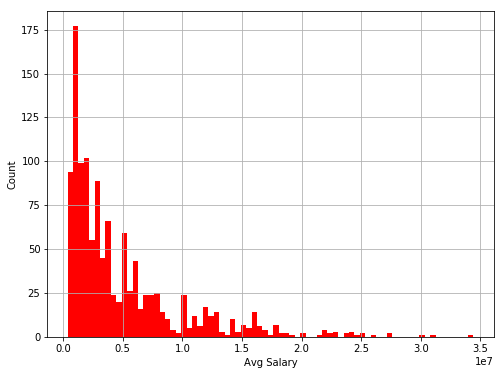

In [13]:
plt.figure(figsize=(8, 6))
plt.hist(df['Salary'], bins=75, color='r')
plt.xlabel('Avg Salary')
plt.ylabel('Count')
plt.grid()
plt.show()

In [15]:
s_logsal = np.log(df['Salary'].copy())

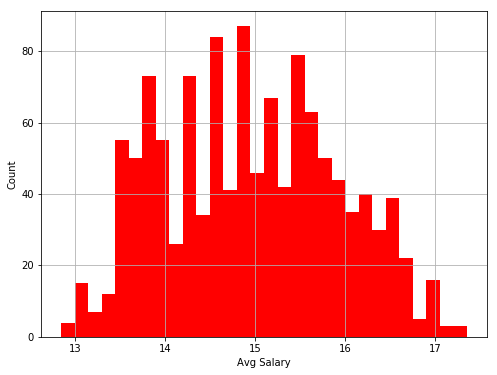

In [18]:
plt.figure(figsize=(8, 6))
plt.hist(s_logsal, bins=30, color='r')
plt.xlabel('Avg Salary')
plt.ylabel('Count')
plt.grid()
plt.show()

In [73]:
df_x_cols = df_x.columns.tolist()
print(df_x_cols)

['Yr', 'G', 'AB', 'PA', 'H_b', '1B', '2B', '3B', 'HR_b', 'R_b', 'RBI', 'BB_b', 'IBB_b', 'SO_b', 'BB%', 'K%', 'BB/K', 'BABIP_b', 'HBP_b', 'SF', 'SH', 'GDP', 'SB', 'CS', 'Def', 'ISO', 'wOBA', 'wRAA', 'AVG', 'OBP', 'SLG', 'OPS', 'WAR', 'wRC+', 'WPA', 'W', 'L', 'GS', 'CG', 'IP', 'H_p', 'HR_p', 'BB_p', 'SO_p', 'R_p', 'SV', 'BS', 'BK', 'ER', 'HBP_p', 'HLD', 'IBB_p', 'ShO', 'TBF', 'WP', 'HR/9', 'BB/9', 'K/9', 'K/BB', 'K-BB%', 'GB%', 'HR/FB', 'LOB%', 'ERA', 'BABIP_p', 'FIP', 'WHIP']


In [74]:
cat_cols_x = ['Yr']

real_cols_y = ['G', 'AB', 'PA', 'H_b', '1B', '2B', '3B', 'HR_b', 'R_b', 'RBI', 'BB_b', 'IBB_b', 'SO_b', 'BB%', 'K%',
               'BB/K', 'BABIP_b', 'HBP_b', 'SF', 'SH', 'GDP', 'SB', 'CS', 'Def', 'ISO', 'wOBA', 'wRAA', 'AVG', 'OBP',
               'SLG', 'OPS', 'WAR', 'wRC+', 'WPA', 'W', 'L', 'GS', 'CG', 'IP', 'H_p', 'HR_p', 'BB_p', 'SO_p', 'R_p',
               'SV', 'BS', 'BK', 'ER', 'HBP_p', 'HLD', 'IBB_p', 'ShO', 'TBF', 'WP', 'HR/9', 'BB/9', 'K/9', 'K/BB', 'K-BB%',
               'GB%', 'HR/FB', 'LOB%', 'ERA', 'BABIP_p', 'FIP', 'WHIP']

In [81]:
cat_dev_cols_x = {"Yr" : {"2006" : 0, "2007" : 1, "2008" : 2, "2009" : 3, "2010" : 4, "2011" : 5, "2012" : 6, "2013" : 7,
                         "2014" : 8, "2015" : 9, "2016" : 10, "2017" : 11}}

In [83]:
df_y_cols = df_y.columns.tolist()
print(df_y_cols)

['Name', 'Team', 'Contract Yrs', 'Total Salary($)', 'Salary']


In [ ]:
cat_cols_y = ['Name', 'Team', 'Contract Yrs']